# Model Building and Evaluation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve,auc

In [2]:
heart_data = pd.read_csv("Heart_disease_cleveland_new.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


## Data Spliting

In [3]:
x = heart_data.drop('target', axis=1)
y = heart_data['target']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state = 7)

# Fiting Model

In [12]:
models = {
    'KNN': KNeighborsClassifier(),
    'LR': LogisticRegression(),
    'RF': RandomForestClassifier()
}

def fit_and_score(models,x_train,x_text,y_train,y_test):
    np.random.seed(7)
    model_score = {}
    for name,model in models.items():
        model.fit(x_train, y_train)
        model_score[name] = model.score(x_test, y_test)
    return model_score    
        

In [13]:
models_score = fit_and_score(models=models, x_train=x_train, x_text=x_test, y_train=y_train, y_test=y_test)
models_score

D:\Data Science\cardio_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6721311475409836, 'LR': 0.8032786885245902, 'RF': 0.7540983606557377}

<Axes: >

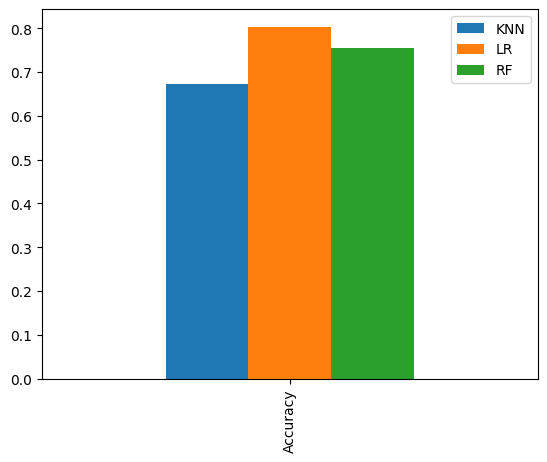

In [14]:
model_compare = pd.DataFrame(models_score,index=['Accuracy'])
model_compare.plot(kind = 'bar')

# HyperParameter Tuning Using RandomizedSearchCV

In [11]:
def knn_hp_rs(x_train,x_text,y_train,y_test):
    knn_hp = {
        'n_neighbors': [3,5,7,9,11,13,15,17,19],
        'weights': ['uniform', 'distance'],
        'p': [1,2,3]
    }
    knn_rs = RandomizedSearchCV(KNeighborsClassifier(),
                       param_distributions = knn_hp,
                       cv = 5,
                       n_iter = 5,      
                       verbose = True,
                      )
    knn_rs.fit(x_train, y_train)
    print(f"Best Parameters: {knn_rs.best_params_}")
    print(f"Accuraacy Of KNN Model: {knn_rs.score(x_test, y_test)}")
    return knn_rs
    
knn_rs = knn_hp_rs(x_train=x_train, x_text=x_test, y_train=y_train, y_test=y_test)
knn_rs

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 19}
Accuraacy Of KNN Model: 0.6885245901639344


,estimator,KNeighborsClassifier()
,param_distributions,"{'n_neighbors': [3, 5, ...], 'p': [1, 2, ...], 'weights': ['uniform', 'distance']}"
,n_iter,5
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [18]:
def rfc_hp_rs(x_train,x_text,y_train,y_test):
    rfc_hp = {
        "n_estimators": np.arange(10,1600,10),
        "max_depth": [None,3,5,6,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2),
    }
    rfc_rs = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions = rfc_hp,
                       cv = 5,
                       n_iter = 5,
                       verbose = True,
                       random_state = 7
                      )
    rfc_rs.fit(x_train, y_train)
    print(f"Best Parameters: {rfc_rs.best_params_}")
    print(f"Accuraacy Of RFC Model: {rfc_rs.score(x_test, y_test)}")
    return rfc_rs
    
rfc_rc = rfc_hp_rs(x_train=x_train, x_text=x_test, y_train=y_train, y_test=y_test)
rfc_rc

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'n_estimators': np.int64(820), 'min_samples_split': np.int64(14), 'min_samples_leaf': np.int64(9), 'max_depth': 6}
Accuraacy Of RFC Model: 0.819672131147541


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ..., 1580, 1590])}"
,n_iter,5
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,7
,error_score,nan


In [19]:
def lr_hp_rs(x_train,x_text,y_train,y_test):
    lr_hp = {
        "C":np.logspace(-4,4,20),
        "solver":['liblinear']
    }
    lr_rs = RandomizedSearchCV(LogisticRegression(),
                       param_distributions = lr_hp,
                       cv = 5,
                       n_iter = 20,     
                       verbose = True,
                       random_state = 7
                      )
    lr_rs.fit(x_train, y_train)
    print(f"Best Parameters: {lr_rs.best_params_}")
    print(f"Accuraacy Of RFC Model using Randomized Search CV: {lr_rs.score(x_test, y_test)}")
    return lr_rs
    
lr_rs = lr_hp_rs(x_train=x_train, x_text=x_test, y_train=y_train, y_test=y_test)
lr_rs

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'solver': 'liblinear', 'C': np.float64(0.615848211066026)}
Accuraacy Of RFC Model using Randomized Search CV: 0.819672131147541


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,7
,error_score,nan


# Hyperparameter Tuning Using Grid Search CV

In [20]:
def knn_hp_tuning(x_train,x_text,y_train,y_test):
    knn_hp = {
        'n_neighbors': [3,5,7,9,11,13,15,17,19],
        'weights': ['uniform', 'distance'],
        'p': [1,2,3]
    }
    np.random.seed(7)
    knn_gr = GridSearchCV(KNeighborsClassifier(),
                       param_grid = knn_hp,
                       cv = 5,
                       verbose = True,
                      )
    knn_gr.fit(x_train, y_train)
    print(f"Best Parameters: {knn_gr.best_params_}")
    print(f"Accuraacy Of KNN Model: {knn_gr.score(x_test, y_test)}")
    return knn_gr
    
knn = knn_hp_tuning(x_train=x_train, x_text=x_test, y_train=y_train, y_test=y_test)
knn

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
Accuraacy Of KNN Model: 0.7049180327868853


,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'p': [1, 2, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,15


In [5]:
def rfc_hp_tuning(x_train,x_text,y_train,y_test):
    rfc_hp = {
        "n_estimators": np.arange(10,1000,10),
        "max_depth": [None,3,5,6],
        #"min_samples_split":np.arange(2,10,2),
        #"min_samples_leaf":np.arange(1,10,2),
    }
    np.random.seed(7)
    rfc_gr = GridSearchCV(RandomForestClassifier(),
                       param_grid = rfc_hp,
                       cv = 5,
                       verbose = True,
                      )
    rfc_gr.fit(x_train, y_train)
    print(f"Best Parameters: {rfc_gr.best_params_}")
    print(f"Accuraacy Of RFC Model: {rfc_gr.score(x_test, y_test)}")
    return rfc_gr
    
rfc = rfc_hp_tuning(x_train=x_train, x_text=x_test, y_train=y_train, y_test=y_test)
rfc

Fitting 5 folds for each of 396 candidates, totalling 1980 fits
Best Parameters: {'max_depth': None, 'n_estimators': np.int64(170)}
Accuraacy Of RFC Model: 0.7704918032786885


,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [None, 3, ...], 'n_estimators': array([ 10, ...70, 980, 990])}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,np.int64(170)


In [21]:
def lr_hp_tuning(x_train,x_test,y_train,y_test):
    lr_hp = {
        "C":np.logspace(-4,4,20),
        "solver":['liblinear']
    }
    np.random.seed(7)
    lr_gr = GridSearchCV(LogisticRegression(),
                       param_grid = lr_hp,
                       cv = 5,
                       verbose = True,
                      )
    lr_gr.fit(x_train, y_train)
    print(f"Best Parameters: {lr_gr.best_params_}")
    print(f"Accuraacy Of RFC Model: {lr_gr.score(x_test, y_test)}")
    return lr_gr
lr_gr = lr_hp_tuning(x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
lr_gr

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': np.float64(0.615848211066026), 'solver': 'liblinear'}
Accuraacy Of RFC Model: 0.819672131147541


,estimator,LogisticRegression()
,param_grid,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


# Evaluate Model

# Area Under The Curve

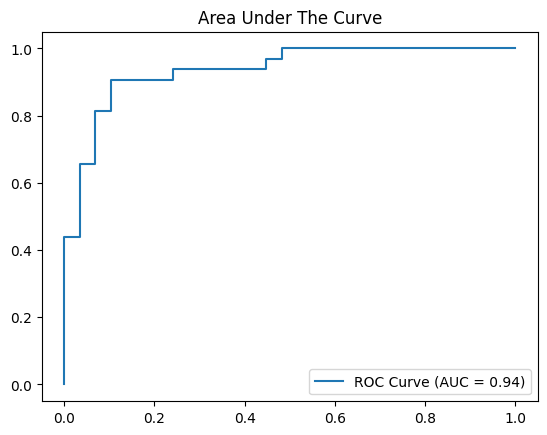

In [22]:
y_preds = lr_gr.predict(x_test)
y_pred_proba = lr_gr.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
#plt.xlabel("False Positive Rate")
#plt.ylabel("True Positive Rate")
plt.title("Area Under The Curve")
plt.legend()
plt.show()

# Confusion Matrix

[[27  2]
 [ 9 23]]


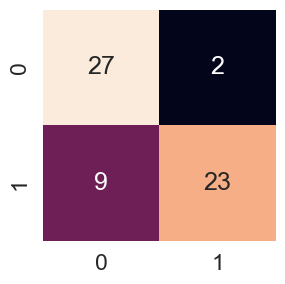

In [23]:
print(confusion_matrix(y_test,y_preds))
sns.set(font_scale=1.5)
def plot_confusion(y_test,y_preds):
    fig,ax = plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
plot_confusion(y_test,y_preds)   

# Classification Report

In [24]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83        29
           1       0.92      0.72      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



# Cross Validation

## Accuracy

In [25]:
cv_accuracy = cross_val_score(lr_gr,
                              x,
                              y,
                              cv=7,
                              scoring="accuracy")
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


np.float64(0.8382663847780124)

## Precision

In [26]:
cv_precision = cross_val_score(lr_gr,
                              x,
                              y,
                              cv=7,
                              scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


np.float64(0.8509372169920599)

## Recall

In [27]:
cv_recall = cross_val_score(lr_gr,
                              x,
                              y,
                              cv=7,
                              scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


np.float64(0.7924812030075188)

## f1 Score

In [28]:
cv_f1 = cross_val_score(lr_gr,
                         x,
                         y,
                         cv=7,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


np.float64(0.8173343136757772)

# Visualizing the cross validated Matrices


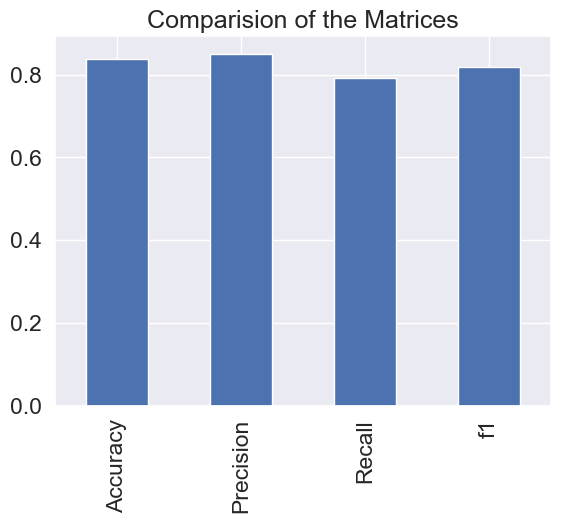

In [29]:
cv_plot = pd.DataFrame({
    "Accuracy":cv_accuracy,
    "Precision":cv_precision,
    "Recall":cv_recall,
    "f1":cv_f1
}, index=[0])
cv_plot.T.plot.bar(title="Comparision of the Matrices",
                legend=False);

# Save Model

In [30]:
import pickle
pickle.dump(lr_gr,open("Heart_Disease_Predictor.pkl","wb"))